In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fec = pd.read_csv('schedule.csv')
fec.head() #1

,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00697441,WIN THE ERA PAC,2019,Q1,201907129150568985,17A,552118,1338412,NaN,IND,...,F3P,4071220191659333196,t,* EARMARKED CONTRIBUTION: SEE BELOW,2020,SA,NaN,4071320191659521577,http://docquery.fec.gov/cgi-bin/fecimg/?201907...,Contributions From Individuals/Persons Other T...
1,C00697441,WIN THE ERA PAC,2019,Q1,201907129150570846,17A,437162,1338412,NaN,IND,...,F3P,4071220191659333196,t,* EARMARKED CONTRIBUTION: SEE BELOW,2020,SA,NaN,4071320191659527160,http://docquery.fec.gov/cgi-bin/fecimg/?201907...,Contributions From Individuals/Persons Other T...
2,C00697441,WIN THE ERA PAC,2019,Q1,201907129150570847,17A,879199,1338412,NaN,IND,...,F3P,4071220191659333196,t,NaN,2020,SA,NaN,4071320191659527162,http://docquery.fec.gov/cgi-bin/fecimg/?201907...,Contributions From Individuals/Persons Other T...
3,C00697441,WIN THE ERA PAC,2019,Q1,201907129150571545,17A,447171,1338412,NaN,IND,...,F3P,4071220191659333196,t,* EARMARKED CONTRIBUTION: SEE BELOW,2020,SA,NaN,4071320191659529257,http://docquery.fec.gov/cgi-bin/fecimg/?201907...,Contributions From Individuals/Persons Other T...
4,C00697441,WIN THE ERA PAC,2019,Q1,201907129150569583,17A,579151,1338412,NaN,IND,...,F3P,4071220191659333196,t,* EARMARKED CONTRIBUTION: SEE BELOW,2020,SA,NaN,4071320191659523371,http://docquery.fec.gov/cgi-bin/fecimg/?201907...,Contributions From Individuals/Persons Other T...


In [36]:
fec.info() #2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 79 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   committee_id                           2871 non-null   object 
 1   committee_name                         2871 non-null   object 
 2   report_year                            2871 non-null   int64  
 3   report_type                            2871 non-null   object 
 4   image_number                           2871 non-null   int64  
 5   line_number                            2871 non-null   object 
 6   transaction_id                         2871 non-null   object 
 7   file_number                            2871 non-null   int64  
 8   committee_name.1                       0 non-null      float64
 9   entity_type                            2871 non-null   object 
 10  entity_type_desc                       2871 non-null   object 
 11  unus

In [37]:
print(fec.iloc[0,:]) #3

committee_id                                                 C00697441
committee_name                                         WIN THE ERA PAC
report_year                                                       2019
report_type                                                         Q1
image_number                                        201907129150568985
                                           ...                        
schedule_type                                                       SA
increased_limit                                                    NaN
sub_id                                             4071320191659521577
pdf_url              http://docquery.fec.gov/cgi-bin/fecimg/?201907...
line_number_label    Contributions From Individuals/Persons Other T...
Name: 0, Length: 79, dtype: object


In [38]:
fec.committee_name.unique() #4

array(['WIN THE ERA PAC', 'WARREN FOR PRESIDENT, INC.', 'AMY FOR AMERICA',
       'INSLEE FOR AMERICA', 'TIM RYAN FOR AMERICA',
       'DONALD J. TRUMP FOR PRESIDENT, INC.', 'BERNIE 2020',
       'FRIENDS OF JOHN DELANEY', 'BULLOCK FOR PRESIDENT',
       'MARIANNE WILLIAMSON FOR PRESIDENT', 'BIDEN FOR PRESIDENT',
       'HICKENLOOPER 2020', 'FRIENDS OF ANDREW YANG',
       'WALSH FOR PRESIDENT', 'CORY 2020', 'BENNET FOR AMERICA',
       'COMMITTEE TO ELECT MARK CHARLES FOR PRESIDENT',
       'KAMALA HARRIS FOR THE PEOPLE'], dtype=object)

In [39]:
nameArray = fec.committee_name.unique()
print(nameArray[0]) #5

WIN THE ERA PAC


In [40]:
fec_map = {'WIN THE ERA PAC':'Democratic','WARREN FOR PRESIDENT, INC.':'Democratic', 'AMY FOR AMERICA':'Democratic', 'INSLEE FOR AMERICA':'Democratic','TIM RYAN FOR AMERICA':'Democratic', 'DONALD J. TRUMP FOR PRESIDENT, INC.':'Republican', 'BERNIE 2020':'Democratic', 'FRIENDS OF JOHN DELANEY':'Democratic', 'BULLOCK FOR PRESIDENT':'Democratic', 'MARIANNE WILLIAMSON FOR PRESIDENT':'Democratic', 'BIDEN FOR PRESIDENT': 'Democratic', 'HICKENLOOPER 2020':'Democratic', 'FRIENDS OF ANDREW YANG':'Democratic','WALSH FOR PRESIDENT':'Republican','CORY 2020':'Democratic', 'BENNET FOR AMERICA':'Democratic', 'COMMITTEE TO ELECT MARK CHARLES FOR PRESIDENT':'Independent', 'KAMALA HARRIS FOR THE PEOPLE':'Democratic'}
#6

In [41]:
fec['party_affiliation'] = fec.committee_name.map(fec_map) #7

In [42]:
fec[['committee_name', 'party_affiliation']].head() #8

,committee_name,party_affiliation
0,WIN THE ERA PAC,Democratic
1,WIN THE ERA PAC,Democratic
2,WIN THE ERA PAC,Democratic
3,WIN THE ERA PAC,Democratic
4,WIN THE ERA PAC,Democratic


In [43]:
fec['party_affiliation'].value_counts() #9

Democratic     2356
Republican      514
Independent       1
Name: party_affiliation, dtype: int64

In [44]:
print("Database length:", len(fec)) #10

Database length: 2871


In [45]:
column = fec['contribution_receipt_amount']
count = column[column > 0].count()
print("Number of contributions > 0:", count) #11

Number of contributions > 0: 2871


In [46]:
count2 = column[column <= 0].count()
print("Number of contributions <= 0:", count2) #12

Number of contributions <= 0: 0


In [47]:
fec = fec[fec.contribution_receipt_amount > 0] 
print("Length of dataframe without 0 or neg contributions", count) #13

Length of dataframe without 0 or neg contributions 2871


In [48]:
count3 = fec['contributor_occupation'].value_counts()
print(count3[:30]) #14

NOT EMPLOYED                    566
RETIRED                         407
SOCIAL WORKER                   111
NONE                             88
ATTORNEY                         64
QUALITY ASSURANCE WORKER         59
WRITER                           52
INSERT OPERATOR                  39
INTERNET MARKETING               35
WRITING CONSULTANT               31
ACCOUNTANT                       31
LAW                              31
ENTREPRENEUR                     30
EDITOR                           29
PHYSICIAN                        27
DENTIST                          27
POSTAL WORKER                    26
MARKETING                        25
ACTUARY                          23
HOME DESIGNER                    23
PROFESSOR                        22
STATE REPRESENTATIVE             22
LAWYER                           21
OPERATIONS MANAGER               20
IT                               19
CRITICAL FACILITIES ENGINEER     18
TUTOR                            18
TECHNICIAN                  

In [49]:
employer_mapping = {'NOT EMPLOYED': 'NONE', 'NOT-EMPLOYED':'NONE', 'SELF-EMPLOYED':'SELF', 'SELF EMPLOYED':'SELF', 'SELF EMPLOYED EMPLOYED':'SELF', 'MIDAMAR CORPORATION':'MIDAMAR FOODS', 'DRAKE UNIVERSITY':'DRAKE UNIV.','HY-VEE':'HY-VEE INC','HYVEE':'HY-VEE INC','MERCY MEDICAL CENTER':'MERCY CLINICS INC','MERCY':'MERCY CLINICS INC','STATE OF IA':'STATE OF IOWA','POLK COUNTY IOWA':'POLK COUNTY','STATE GOVERNMENT':'STATE OF IOWA','DMACC':'DES MOINES AREA COMM COLLEGE'}
fun2 = lambda x: employer_mapping.get(x,x)
fec['contributor_employer'] = fec.contributor_employer.map(fun2) #15

In [50]:
occupation_mapping = {'NOT EMPLOYED': 'NONE', 'NOT-EMPLOYED':'NONE', 'SELF-EMPLOYED':'SELF', 'SELF EMPLOYED':'SELF', 'WRITER':'WRITER/EDITOR', 'EMPLOYEE':'STAFF', 'IT':'TECH', 'DESKTOP TECHNICIAN':'TECH', 'FAST FOOD EMPLOYEE':'EMPLOYEE', 'TECHNICIAN':'TECH', 'SALES':'RETAIL SALES', 'IT SYSTEM ANALYST I':'IT ANALYST', 'ACCOUNTING ASSOCIATE':'ACCOUNTANT'}
fun3 = lambda x: occupation_mapping.get(x,x)
fec['contributor_occupation'] = fec.contributor_occupation.map(fun3) #16

In [51]:
count4 = fec['contributor_occupation'].value_counts()
print(count4[:30]) #17

NONE                            655
RETIRED                         407
SOCIAL WORKER                   111
ATTORNEY                         64
QUALITY ASSURANCE WORKER         59
WRITER/EDITOR                    58
TECH                             44
INSERT OPERATOR                  39
ACCOUNTANT                       35
INTERNET MARKETING               35
RETAIL SALES                     32
WRITING CONSULTANT               31
LAW                              31
ENTREPRENEUR                     30
EDITOR                           29
DENTIST                          27
PHYSICIAN                        27
POSTAL WORKER                    26
MARKETING                        25
HOME DESIGNER                    23
ACTUARY                          23
STATE REPRESENTATIVE             22
PROFESSOR                        22
LAWYER                           21
OPERATIONS MANAGER               20
CRITICAL FACILITIES ENGINEER     18
TUTOR                            18
DIGITAL MARKETER            

In [52]:
pivotFec = fec.pivot_table(index = 'contributor_occupation', values='contribution_receipt_amount',columns='party_affiliation', aggfunc='sum')
print(pivotFec)
#18

party_affiliation              Democratic  Independent  Republican
contributor_occupation                                            
ACCOUNT RESOLUTION MANAGER          63.00          NaN         NaN
ACCOUNTANT                        1730.23          NaN       107.5
ACTUARY                           2609.00          NaN         NaN
ADJUNCT PROFESSOR                  120.00          NaN         NaN
ADMINISTRATIVE ASSISTANT           205.00          NaN         NaN
...                                   ...          ...         ...
VICE PRESIDENT OF DEVELOPMENT      166.00          NaN         NaN
WATER QUALITY PROJECT MANAGER       75.00          NaN         NaN
WEB DEVELOPER                       50.00          NaN         NaN
WRITER/EDITOR                     2345.85          NaN         NaN
WRITING CONSULTANT                 374.74          NaN         NaN

[208 rows x 3 columns]


In [53]:
over_2000 = pivotFec[(pivotFec['Democratic']> 2000) | 
(pivotFec['Republican'] > 2000)] 
print(over_2000)
#19

party_affiliation       Democratic  Independent  Republican
contributor_occupation                                     
ACTUARY                    2609.00          NaN         NaN
ATTORNEY                   9900.00          NaN        5.00
BUSINESS OWNER             4839.72          NaN      225.00
CEO                        3000.00          NaN         NaN
CONSULTANT                 3497.49          NaN         NaN
LAW                        3222.00          NaN         NaN
LAWYER                     2175.00          NaN         NaN
NONE                      37774.26          NaN     1146.51
OWNER                      9500.00          NaN      582.75
PHYSICIAN                  4422.00          NaN         NaN
RETIRED                    4224.95          NaN    13332.90
SOFTWARE ENGINEER          3041.92          NaN         NaN
WRITER/EDITOR              2345.85          NaN         NaN


<AxesSubplot:xlabel='contributor_occupation'>

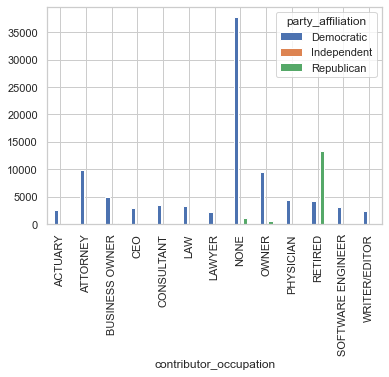

In [102]:
over_2000.plot(kind ='bar')

#20
